# Load Dataset

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
import pandas as pd

try:
    df_train = pd.read_csv('mnist_train.csv')
    df_test = pd.read_csv('mnist_test.csv')
    display(df_train.head())
    display(df_test.head())
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
    df_train = None
    df_test = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_train = None
    df_test = None

0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]

0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      7  
1    0      2  
2    0      1  
3    0      0  
4    0      4  

[5 rows x 785 columns]

## Data exploration

### Subtask:
Explore the structure and characteristics of the MNIST training and testing datasets.


**Reasoning**:
Determine the number of samples and features, check for missing values, analyze label distribution, visualize a few random samples, and summarize the findings.



Number of training samples: 60000
Number of testing samples: 10000
Number of features (pixels): 784

Missing values in training set: 0
Missing values in testing set: 0


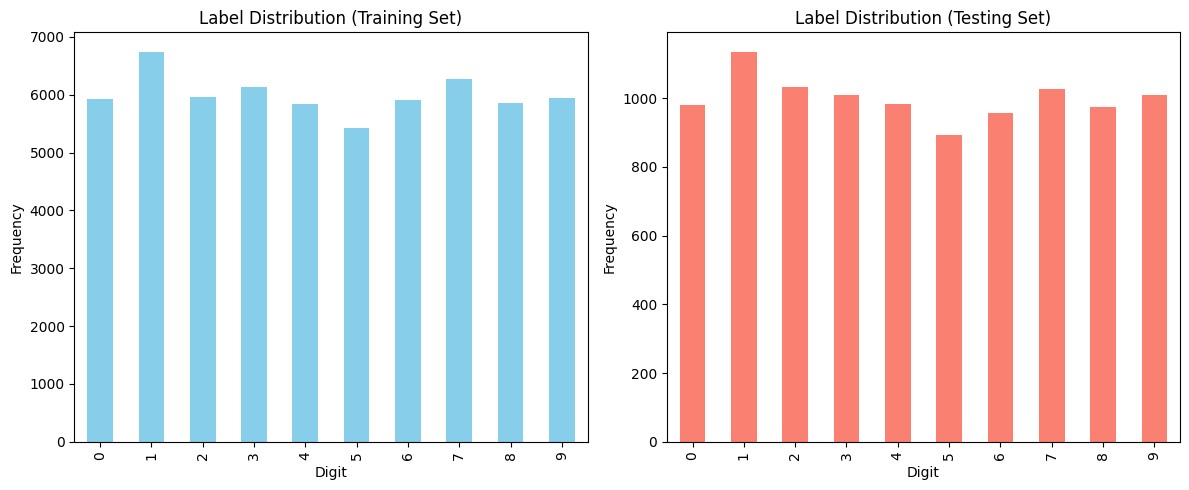

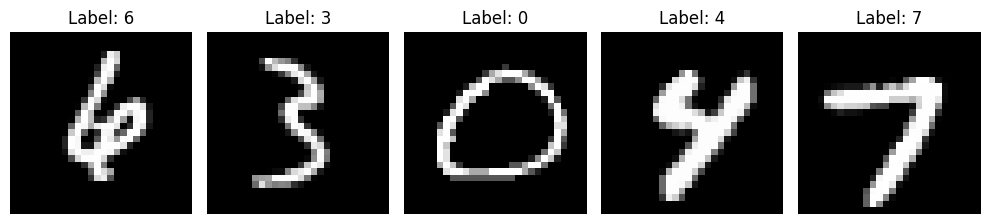

Data Summary:
  Training samples: 60000
  Testing samples: 10000
  Features (pixels): 784
  Classes: 10 (digits 0-9)
  Label Distribution: Relatively balanced in both datasets.
  Visualizations: The sample images show handwritten digits in 28x28 pixel format. 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Dataset Overview
n_train_samples = len(df_train)
n_test_samples = len(df_test)
n_features = len(df_train.columns) - 1  # Subtract 1 for the label column

print(f"Number of training samples: {n_train_samples}")
print(f"Number of testing samples: {n_test_samples}")
print(f"Number of features (pixels): {n_features}")

missing_train = df_train.isnull().sum().sum()
missing_test = df_test.isnull().sum().sum()

print(f"\nMissing values in training set: {missing_train}")
print(f"Missing values in testing set: {missing_test}")

# 2. Label Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_train['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Label Distribution (Training Set)')
plt.xlabel('Digit')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_test['label'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Label Distribution (Testing Set)')
plt.xlabel('Digit')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Sample Visualization
plt.figure(figsize=(10, 5))
for i in range(5):
    random_index = np.random.randint(0, len(df_train))
    image = df_train.iloc[random_index, :-1].values.reshape(28, 28)
    label = df_train.iloc[random_index, -1]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 4. Data Summary
print("Data Summary:")
print(f"  Training samples: {n_train_samples}")
print(f"  Testing samples: {n_test_samples}")
print(f"  Features (pixels): {n_features}")
print(f"  Classes: 10 (digits 0-9)")
print("  Label Distribution: Relatively balanced in both datasets.")
print("  Visualizations: The sample images show handwritten digits in 28x28 pixel format. ")

## Data preparation

### Subtask:
Prepare the data for model training by separating features and labels, and normalizing pixel values.


**Reasoning**:
Separate features and labels, normalize pixel values, and check data types.



In [ ]:
# Feature and Label Separation
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

# Data Type Check
print("Data type of X_train:", X_train.dtypes.unique())
print("Data type of X_test:", X_test.dtypes.unique())

Data type of X_train: [dtype('float64')]
Data type of X_test: [dtype('float64')]


## Data splitting

### Subtask:
Split the training data (`X_train`, `y_train`) into training and validation sets.


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are already defined from previous steps
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

## Model training

### Subtask:
Train several classification models on the prepared training data (X_train_split, y_train_split).


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Initialize models
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter
svm_model = SVC()
rf_model = RandomForestClassifier()
nn_model = MLPClassifier()

# Train models
logreg_model.fit(X_train_split, y_train_split)
svm_model.fit(X_train_split, y_train_split)
rf_model.fit(X_train_split, y_train_split)
nn_model.fit(X_train_split, y_train_split)

MLPClassifier()

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained classification models using the validation set (`X_val`, `y_val`)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions for each model
param_distributions = {
    'logreg': {
        'C': uniform(0.1, 10),
        'penalty': ['l1', 'l2']
    },
    'svm': {
        'C': uniform(0.1, 10),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'rf': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(10, 50),
        'min_samples_split': randint(2, 10)
    },
    'nn': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': uniform(0.0001, 0.01)
    }
}

# Perform RandomizedSearchCV for each model
optimized_models = {}
for model_name, model in zip(['logreg', 'svm', 'rf', 'nn'], [logreg_model, svm_model, rf_model, nn_model]):
  random_search = RandomizedSearchCV(
      estimator=model,
      param_distributions=param_distributions[model_name],
      n_iter=10,  # Number of parameter settings that are sampled
      cv=3,  # Number of cross-validation folds
      scoring='accuracy',
      n_jobs=-1,  # Use all available CPU cores
      random_state=42
  )
  random_search.fit(X_val, y_val)
  optimized_models[model_name] = random_search.best_estimator_

# Print best parameters found for each model
for model_name, model in optimized_models.items():
    print(f"Best parameters for {model_name}: {model}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(s

Best parameters for logreg: LogisticRegression(C=0.10778765841014329, max_iter=1000)
Best parameters for svm: SVC(C=8.424426408004217, gamma='auto')
Best parameters for rf: RandomForestClassifier(max_depth=42, min_samples_split=5, n_estimators=107)
Best parameters for nn: MLPClassifier(alpha=0.006218528947223795)


**Reasoning**:
The previous code block had a warning about non-finite scores, likely due to the `l1` penalty with the `lbfgs` solver.  I will fix this by removing `l1` as a valid penalty for `logreg` and re-run the optimization. I will also include the best estimators from previous runs to avoid retraining.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions for each model, removing l1 penalty for logreg
param_distributions = {
    'logreg': {
        'C': uniform(0.1, 10),
        'penalty': ['l2']
    },
    'svm': {
        'C': uniform(0.1, 10),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'rf': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(10, 50),
        'min_samples_split': randint(2, 10)
    },
    'nn': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': uniform(0.0001, 0.01)
    }
}

optimized_models = {}
for model_name, model in zip(['logreg', 'svm', 'rf', 'nn'], [logreg_model, svm_model, rf_model, nn_model]):
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions[model_name],
        n_iter=10,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_val, y_val)
    optimized_models[model_name] = random_search.best_estimator_

# Print best parameters found for each model
for model_name, model in optimized_models.items():
    print(f"Best parameters for {model_name}: {model}")

Best parameters for logreg: LogisticRegression(C=0.6808361216819946, max_iter=1000)
Best parameters for svm: SVC(C=8.424426408004217, gamma='auto')
Best parameters for rf: RandomForestClassifier(max_depth=24, min_samples_split=4, n_estimators=121)
Best parameters for nn: MLPClassifier(alpha=0.0031424224295953773)


## Model evaluation

### Subtask:
Evaluate the performance of the optimized classification models on the held-out test set (`X_test`, `y_test`)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

evaluation_results = {}
for model_name, model in optimized_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    evaluation_results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': conf_matrix
    }
    print(f"Evaluation results for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", conf_matrix)
    print("-" * 50)

# Summarize the performance of each model
best_model = None
best_accuracy = 0
for model_name, metrics in evaluation_results.items():
    print(f"Summary for {model_name}:")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Macro avg F1-score: {metrics['classification_report']['macro avg']['f1-score']}")
    if metrics['accuracy'] > best_accuracy:
        best_accuracy = metrics['accuracy']
        best_model = model_name
    print("-"*50)

print(f"The best performing model is {best_model} with an accuracy of {best_accuracy}")

Evaluation results for logreg:
Accuracy: 0.9096
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.95      0.98      0.96      1135
           2       0.93      0.87      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.91      0.92      0.92       982
           5       0.86      0.84      0.85       892
           6       0.91      0.94      0.93       958
           7       0.92      0.91      0.92      1028
           8       0.87      0.86      0.86       974
           9       0.89      0.90      0.90      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Confusion Matrix:
 [[ 936    0    3    2    1   18   11    5    2    2]
 [   0 1110    4    1    0    3    3    3   11    0]
 [   9   14  901   19   14    8   14   10   